# NLP Model
----

In [122]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
# nltk.download()
import glob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import gutenberg, stopwords
from collections import Counter
%matplotlib inline

In [149]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras import regularizers

In [2]:
english_stops = stopwords.words('english')

In [2]:
print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [3]:
ham = gutenberg.raw('shakespeare-hamlet.txt')

In [110]:
len(ham)

162881

## Movie Review

In [104]:
pos_path = "./data/movie_reviews/pos"
allPosFiles = glob.glob(pos_path + "/*.txt")
data = ''
rawPostData = ''
df_movie_reviews = pd.DataFrame(columns=['review', 'class'])

# for file_ in allPosFiles:
for idx, file_ in enumerate(allPosFiles):
    with open(file_, 'r') as myfile:
        data = myfile.read().replace('\n', '')
        rawPostData += data
        df_movie_reviews = df_movie_reviews.append({'review': data, 'class': 1}, ignore_index=True)

In [105]:
pos_path = "./data/movie_reviews/neg"
allNegFiles = glob.glob(pos_path + "/*.txt")
data = ''
rawNegData = ''

for idx, file_ in enumerate(allNegFiles):
    with open(file_, 'r') as myfile:
        data = myfile.read().replace('\n', '')
        rawNegData += data
        df_movie_reviews = df_movie_reviews.append({'review': data, 'class': 0}, ignore_index=True)

In [106]:
print(f'Shape: {df_movie_reviews.shape}')
df_movie_reviews.head()

Shape: (2000, 2)


,review,class
0,assume nothing . the phrase is perhaps one of ...,1
1,plot : derek zoolander is a male model . he is...,1
2,i actually am a fan of the original 1961 or so...,1
3,a movie that's been as highly built up as the ...,1
4,""" good will hunting "" is two movies in one : ...",1


In [107]:
# Utility function for standard text cleaning.
def text_cleaner(text):
    # Visual inspection identifies a form of punctuation spaCy does not
    # recognize: the double dash '--'.  Better get rid of it now!
    text = re.sub(r'--',' ',text)
    text = re.sub("[\[].*?[\]]", "", text)
    text = ' '.join(text.split())
    return text

In [108]:
df_movie_reviews['review'] = df_movie_reviews['review'].apply(text_cleaner)
df_movie_reviews['class'] = pd.to_numeric(df_movie_reviews['class'])

In [109]:
df_movie_reviews.head()

,review,class
0,assume nothing . the phrase is perhaps one of ...,1
1,plot : derek zoolander is a male model . he is...,1
2,i actually am a fan of the original 1961 or so...,1
3,a movie that's been as highly built up as the ...,1
4,""" good will hunting "" is two movies in one : a...",1


In [110]:
# Parse the cleaned reviews
# nlp = spacy.load('en')
# nlp.max_length = 4200000
# pos_doc = nlp(rawPostData)

In [111]:
# len(rawPostData)

In [112]:
# df_movie_reviews.iloc[0]['review']

In [113]:
def texter(text):
    # Remove special chars
    document = re.sub(r'\W', ' ', text)
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    tokens = [w for w in word_tokenize(document.lower()) 
                  if w.isalpha()]
    
    no_stops = [t for t in tokens 
                    if t not in english_stops]
    
    lemmatized = [WordNetLemmatizer().lemmatize(t) for t in no_stops]
    
    document = ' '.join(lemmatized)
    
    return document

In [116]:
df_movie_reviews['review'] = df_movie_reviews['review'].apply(texter)

In [117]:
df_movie_reviews['review'][0]

'assume nothing phrase perhaps one used first impression rumor hardly ever seem phrase especially go oscar novak architect main focus three tango delightful funny romantic comedy assumption novak matthew perry shy clumsy chicago based architect along openly gay partner peter steinberg oliver platt fight project day day one job restoring popular building charles newman dylan mcdermott rich well known businessman charles immediately take liking oscar enjoys personality sense humor seeing oscar someone could trust charles asks watch girlfriend unpredictable adventurous girl named amy post neve campbell make living blowing glass charles want know talk go point make sure seeing someone else course oscar gladly take job meet amy art show spark fly two get go oscar feel found one meant content idea amy well another popular phrase good thing must come end stay true oscar well charles walk amy oscar drink one night oscar amy become great friend seem mind think oscar gay afraid share either osca

In [147]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_movie_reviews['review'], df_movie_reviews['class'], test_size=0.33, random_state=53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english")

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train.values)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test.values)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

['aa', 'aaa', 'aaaaaah', 'aaaahhhs', 'aaliyah', 'aalyah', 'aamir', 'aardman', 'aaron', 'aatish']


In [119]:
count_train.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [132]:
count_train.shape

(1340, 29302)

## Logistic Regression

In [126]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
lr = LogisticRegression()

# Fit the classifier to the training data
lr.fit(count_train, y_train)

# Create the predicted tags: pred
pred = lr.predict(count_test)

print('Training set score:', lr.score(count_train, y_train))

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(f'\nTest set score: {score}')

# print('\nTest set score:', lr.score(count_test, y_test))

# Calculate the confusion matrix: cm
pd.crosstab(y_test, pred)

Training set score: 1.0

Test set score: 0.8166666666666667


col_0,0,1
class,,
0,282,63
1,58,257


## TF-IDF

In [124]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test.values)

In [133]:
tfidf_train.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [125]:
lr_2 = LogisticRegression()

# Fit the classifier to the training data
lr_2.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = lr_2.predict(tfidf_test)

print('Training set score:', lr_2.score(tfidf_train, y_train))

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(f'\nTest set score: {score}')

# Calculate the confusion matrix: cm
pd.crosstab(y_test, pred)

Training set score: 0.9865671641791045

Test set score: 0.8090909090909091


col_0,0,1
class,,
0,258,87
1,39,276


In [181]:
n_cols = count_train.shape[1]
input_shape = (n_cols,)

# Init model
model = Sequential()

model.add(Dense(15, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape = input_shape))
model.add(Dense(15, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(Dense(15, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
# model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
# hist = model.fit(count_train, y_train, epochs=5, callbacks=[early_stopping_monitor])

hist = model.fit(count_train, y_train,
          epochs=4,
          validation_data=(count_test, y_test))

# score = model.evaluate(count_test, y_test)

Train on 1340 samples, validate on 660 samples
Epoch 1/4
1340/1340 [==============================] - 1s 1ms/step - loss: 0.5829 - acc: 0.7187 - val_loss: 0.4572 - val_acc: 0.8197
Epoch 2/4
1340/1340 [==============================] - 1s 540us/step - loss: 0.2204 - acc: 0.9604 - val_loss: 0.3911 - val_acc: 0.8364
Epoch 3/4
1340/1340 [==============================] - 1s 536us/step - loss: 0.0914 - acc: 0.9940 - val_loss: 0.3955 - val_acc: 0.8545
Epoch 4/4
1340/1340 [==============================] - 1s 526us/step - loss: 0.0511 - acc: 1.0000 - val_loss: 0.4323 - val_acc: 0.8439


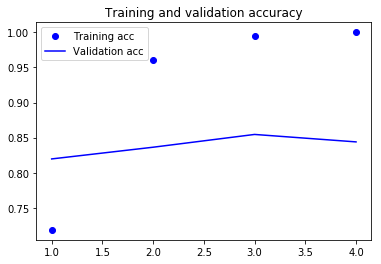

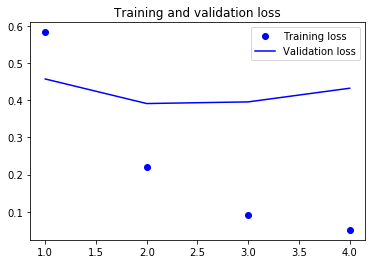

In [182]:
# Plotting
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [180]:
hey = WordNetLemmatizer()
hey.lemmatize('flying')

'flying'